In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import collections
import operator
import matplotlib.lines as mlines
from matplotlib.lines import Line2D  # for legend handle
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

In [2]:
# The data set represents 26 attributes of 205 various import cars
# Each row is an individual model of an import car and each column is an attribute of that car
# The data types include continuous numerical variables, discrete numerical variables, categorical string variables
# The name of the data set is "1985 Auto Imports Database" but the file name is 'imports-85.data'
# I obtained it from the UCI Machine learning Repository
# The URL of the data set is https://archive.ics.uci.edu/ml/datasets/Automobile
# UCI doesn't give a specific license, but it's also found on Kaggle, which has a Database Contents License (DbCL) v1.0
#   which is a royalty-free, non-exclusive, perpetual, irrevocable copyright license to do any act that is restricted by copyright over anything within the Contents, whether in the original medium or any other
# The uncompressed data set has a size of 26 kilobytes and contains 205 rows and 26 columns

df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', 
    sep=',', 
    header=None,
    names=["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
          "body-style", "drive-wheels", "engine-location", "wheel-base", "length",
          "width", "height", "curb-weight", "engine-type", "num-of-cylinders",
          "engine-size", "fuel-system", "bore", "stroke", "compression-ratio",
          "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"],
    na_values=['?'],
    dtype={"price":"float64"}
)

# print(df)

In [3]:
# calculate new variable: convex-volume

df['convex-volume'] = df['length'] * df['width'] * df['height']
#plt.hist(df['convex-volume'])
#plt.show()

Text(0, 0.5, 'Frequency')

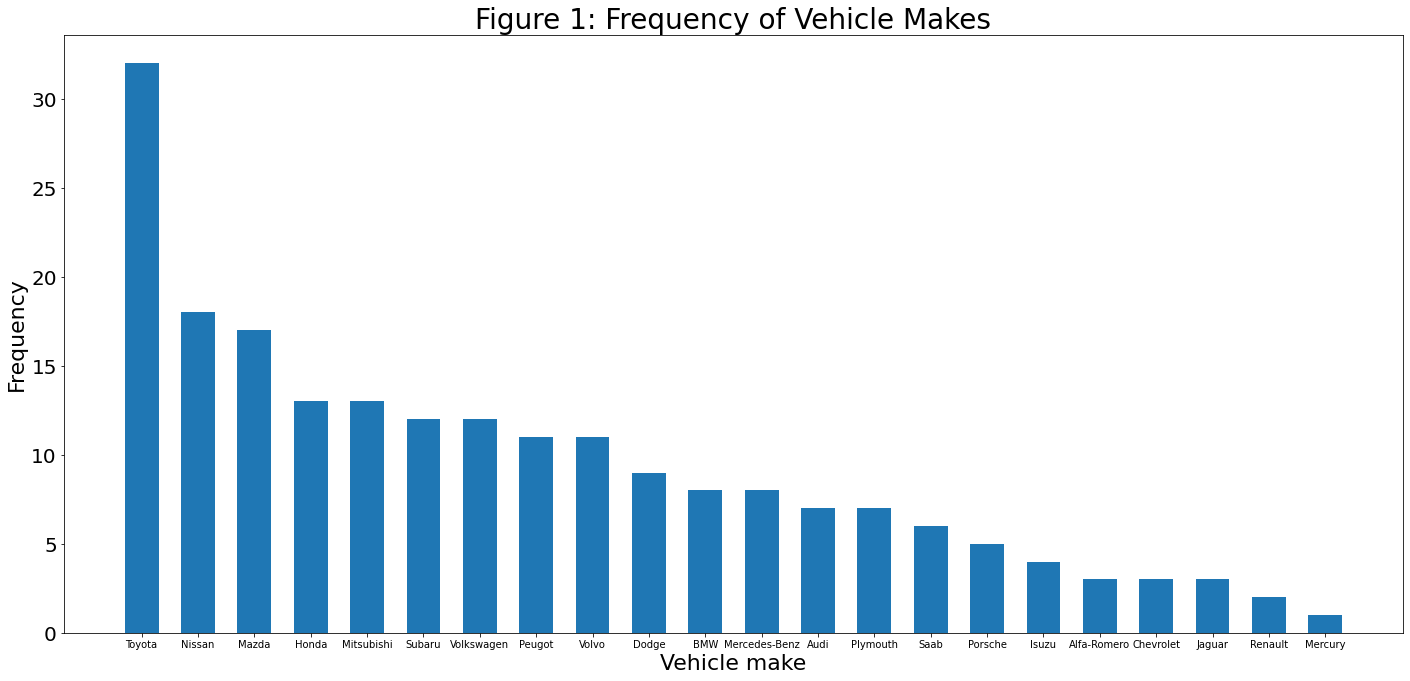

In [4]:
# bar plot of the frequency of vehicle makes

makes = collections.Counter(df['make'])
fig = plt.figure()
fig.set_size_inches(24,11)
makes_title_case = [x.title() for x in list(dict(sorted(makes.items(),key=operator.itemgetter(1), reverse=True)).keys())]
makes_title_case = list(map(lambda x: x.replace('Bmw', 'BMW'), makes_title_case))
plt.bar(makes_title_case,
        dict(sorted(makes.items(),key=operator.itemgetter(1), reverse=True)).values(),
       width=0.6)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('Figure 1: Frequency of Vehicle Makes', size = 28, color = 'Black', alpha = 1)
plt.xlabel('Vehicle make', fontsize=22)
plt.ylabel('Frequency', fontsize=22)

In [5]:
# categorize cars by frequency of make in data set such that
# common_make = True if make has frequency > 10
# common_make = False if make has frequency <= 10

common_makes = df['make'].value_counts() > 10
common_makes = common_makes[common_makes == True].index.values
#len(common_makes[df_common_make == True])
df_common_makes = df[df['make'].isin(common_makes)]
df_1 = df.copy()
df_1['common-make'] = df_1['make'].isin(common_makes)
print(common_makes)

df_1['all'] = ""

['toyota' 'nissan' 'mazda' 'mitsubishi' 'honda' 'volkswagen' 'subaru'
 'peugot' 'volvo']


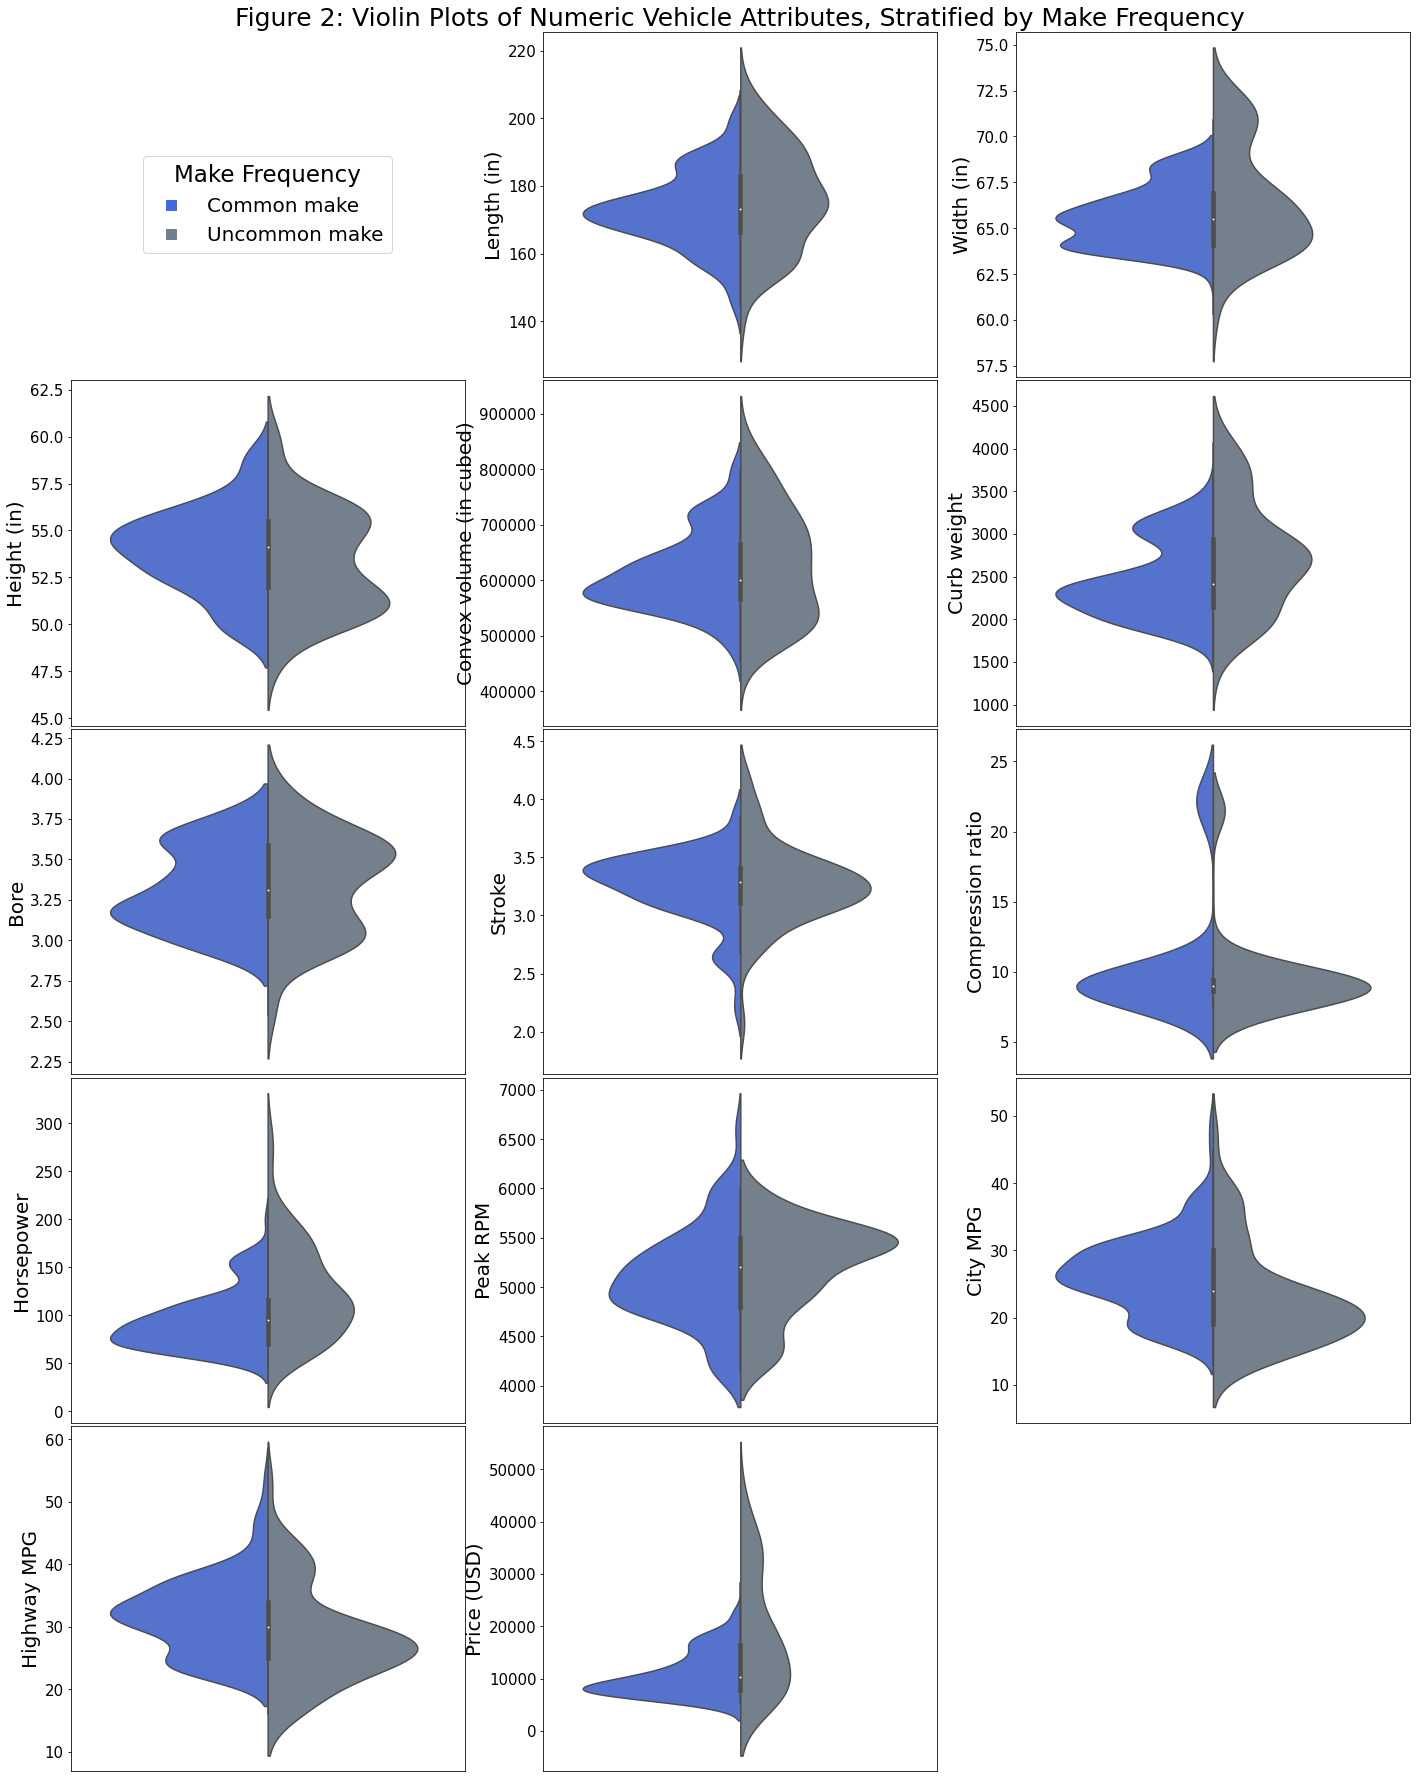

In [6]:
indiv_numeric_attributes = ["length", "width", "height", "convex-volume", "curb-weight",
                           "bore", "stroke", "compression-ratio",
                           "horsepower", "peak-rpm","city-mpg", "highway-mpg",
                           "price"]
indiv_numeric_attribute_names = ["Length (in)", "Width (in)", "Height (in)", "Convex volume (in cubed)", "Curb weight",
                                "Bore", "Stroke", "Compression ratio",
                                "Horsepower", "Peak RPM","City MPG", "Highway MPG",
                                "Price (USD)"]
#makes_title_case = [x.title() for x in list(dict(sorted(makes.items(),key=operator.itemgetter(1), reverse=True)).keys())]
#makes_title_case = list(map(lambda x: x.replace('Bmw', 'BMW'), makes_title_case))
fig = plt.figure()
plt.title('Figure 2: Violin Plots of Numeric Vehicle Attributes, Stratified by Make Frequency', size = 25, color = 'Black', alpha = 1)
plt.axis('off')
fig.subplots_adjust(hspace=0.01, wspace=0.2)
fig.set_size_inches(24,32)

ax1 = fig.add_subplot(5, 3, 1)
azure = mlines.Line2D([], [], color='royalblue', marker='s', linestyle='None',
                          markersize=10, label='Common make')
noire = mlines.Line2D([], [], color='slategrey', marker='s', linestyle='None',
                          markersize=10, label='Uncommon make')
ax1.legend(handles=[azure, noire], title="Make Frequency", loc='center', fontsize=20, title_fontsize=23)
ax1.axis('off')
for i in range(1, len(indiv_numeric_attributes) + 1):
    ax = fig.add_subplot(5, 3, i + 1)
    sns.violinplot(data=df_1, x = "all", y=indiv_numeric_attributes[i - 1],
                  hue = "common-make", hue_order=[True, False], split = True,
                  palette={True: "royalblue", False: "slategrey"})
    ax.set_ylabel(indiv_numeric_attribute_names[i-1], fontsize = 20)
    ax.tick_params(axis='y', which='major', labelsize=15)
    #ax.set_xlabel("")
    ax.xaxis.set_visible(False)
    ax.get_legend().remove()

plt.show()

In [7]:
# subset df_1 to include only cars from top 5 most common makes
df_top5_makes = df_1[df_1['make'].isin(common_makes[0:5])].reset_index()

print(df_top5_makes['make'].value_counts(),"\n-------------------------")
print(df_top5_makes['body-style'].value_counts())

toyota        32
nissan        18
mazda         17
honda         13
mitsubishi    13
Name: make, dtype: int64 
-------------------------
hatchback      45
sedan          35
wagon           8
hardtop         4
convertible     1
Name: body-style, dtype: int64


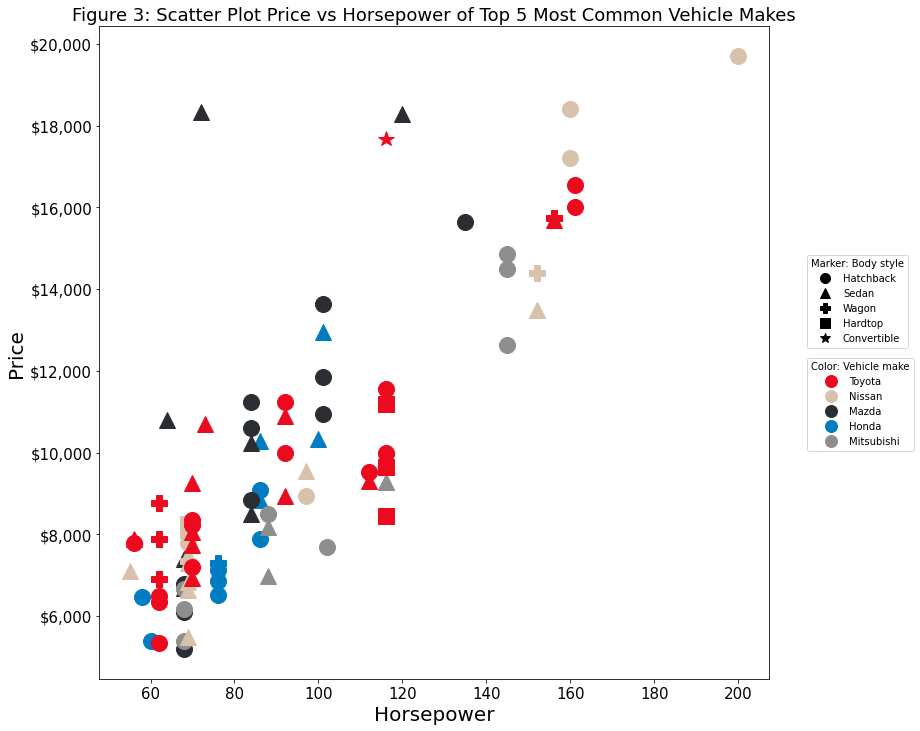

In [8]:
fig, ax = plt.subplots(figsize=(12,12))
colors = {'toyota':'#eb0a1e',
          'nissan':'#d9c2ab',
          'mazda':'#2a2e33',
          'honda':'#007cc3',
          'mitsubishi':'#8e8e8e'}
markers = {'hatchback':'o',
           'sedan':'^',
           'wagon':'P',
           'hardtop':'s',
           'convertible':'*'}
for horsepower, price, make, bodystyle in zip(list(df_top5_makes['horsepower']), list(df_top5_makes['price']), list(df_top5_makes['make']), list(df_top5_makes['body-style'])):
    ax.plot(horsepower, price, marker=markers[bodystyle], color=colors[make], ms = 16)
plt.title('Figure 3: Scatter Plot Price vs Horsepower of Top 5 Most Common Vehicle Makes', size = 18, color = 'Black', alpha = 1)
ax.set_ylabel('Price', fontsize=20)
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_xlabel('Horsepower', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=15)

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k.title(), markersize=14) for k, v in colors.items()]
legend1 = plt.legend(title='Color: Vehicle make', handles=handles, bbox_to_anchor=(1.05,0.5), loc=2)

import matplotlib.lines as mlines
import matplotlib.pyplot as plt

circle = mlines.Line2D([], [], color='k', marker='o', linestyle='None',
                          markersize=10, label='Hatchback')
triangle = mlines.Line2D([], [], color='k', marker='^', linestyle='None',
                          markersize=10, label='Sedan')
cross = mlines.Line2D([], [], color='k', marker='P', linestyle='None',
                          markersize=10, label='Wagon')
square = mlines.Line2D([], [], color='k', marker='s', linestyle='None',
                          markersize=10, label='Hardtop')
star = mlines.Line2D([], [], color='k', marker='*', linestyle='None',
                          markersize=10, label='Convertible')

plt.legend(title = 'Marker: Body style', handles=[circle, triangle, cross, square, star], bbox_to_anchor=(1.05, 0.5), loc=3)
plt.gca().add_artist(legend1)